<a href="https://colab.research.google.com/github/strzelnat/Statistics_basics/blob/main/lessons/basics/lesson5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets

In [ ]:
diabetes = datasets.load_diabetes()
data = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


Text(0.5, 1.0, 'Box plot - bmi')

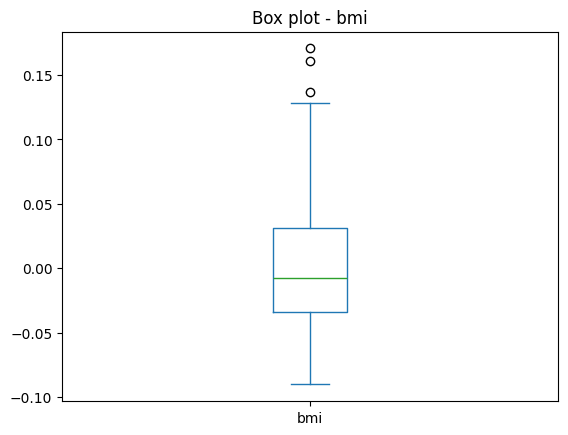

In [ ]:
data['bmi'].plot.box()
plt.title('Box plot - bmi')

<Axes: ylabel='Frequency'>

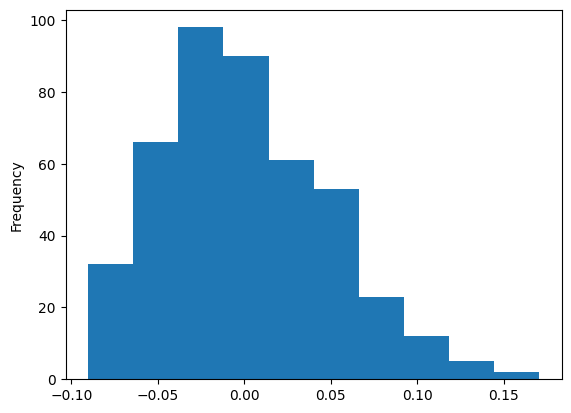

In [ ]:
#right-skewed distribution -> option I to get rid of outliers
data['bmi'].plot.hist()

Text(0.5, 1.0, 'box plot - reduced outliers')

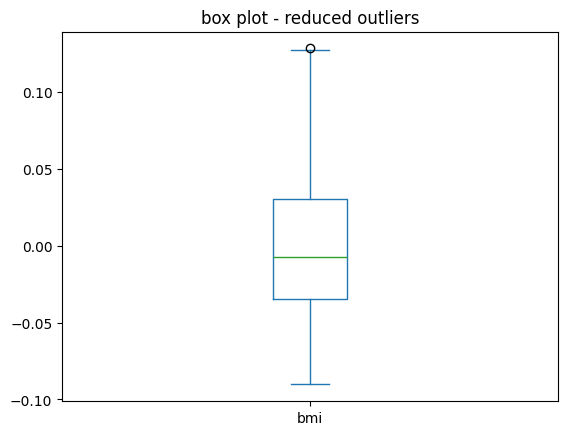

In [ ]:
#option I
#sometimes new outliers can show
q1 = data['bmi'].quantile(0.25)
q3 = data['bmi'].quantile(0.75)
IQR = q3 - q1

bmi = data[(data['bmi'] >= (q1 - 1.5 * IQR)) & (data['bmi'] <= (q3 + 1.5 * IQR))]
outliers = data[(data['bmi'] < (q1 - 1.5 * IQR)) | (data['bmi'] > (q3 + 1.5 * IQR))]
bmi['bmi'].plot.box(meanline = True)
plt.title('box plot - reduced outliers')

In [ ]:
outliers

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
256,-0.049105,-0.044642,0.160855,-0.046985,-0.029088,-0.019790,-0.047082,0.034309,0.028020,0.011349
366,-0.045472,0.050680,0.137143,-0.015999,0.041086,0.031880,-0.043401,0.071210,0.071019,0.048628
367,-0.009147,0.050680,0.170555,0.014987,0.030078,0.033759,-0.021311,0.034309,0.033654,0.032059


Text(0.5, 0.98, 'Box plot')

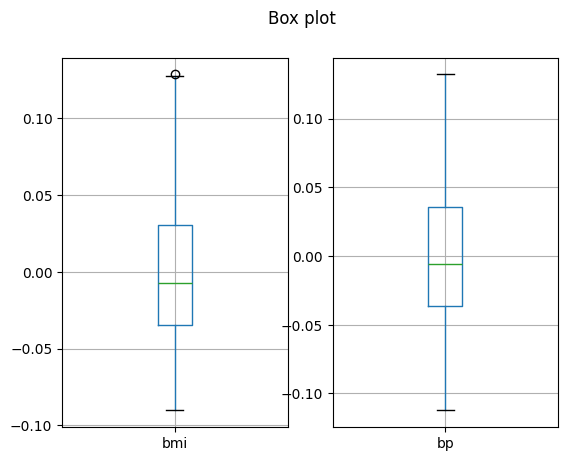

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
bmi.boxplot('bmi', ax = axes[0], meanline  = True)
bmi.boxplot('bp', ax = axes[1], meanline  = True)
fig.suptitle('Box plot')

<Axes: >

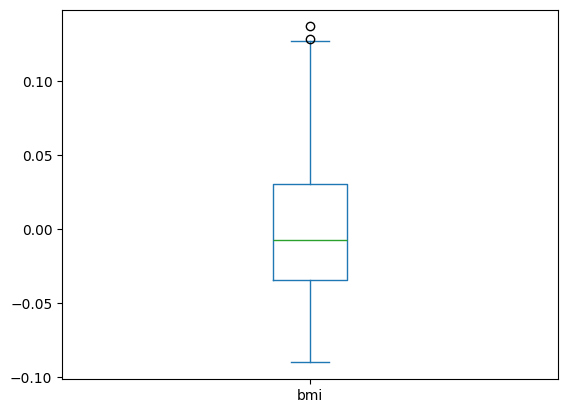

In [ ]:
data['bmi'].plot.box()

<Axes: >

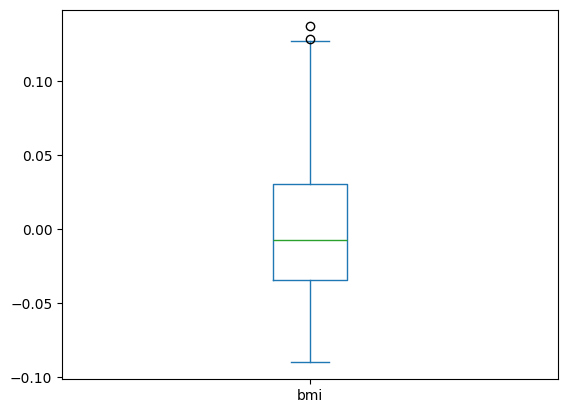

In [ ]:
#second option [μ−3σ,μ+3σ] when normal distribution
#it's not gonna work in this situation -> right-skewed distribution
std = data['bmi'].std()
mean = data['bmi'].mean()
data = data[(data['bmi'] >= mean - 3* std) & (data['bmi'] <= mean + 3 * std)]

data['bmi'].plot.box()

<Axes: xlabel='tip_amount', ylabel='fare_amount'>

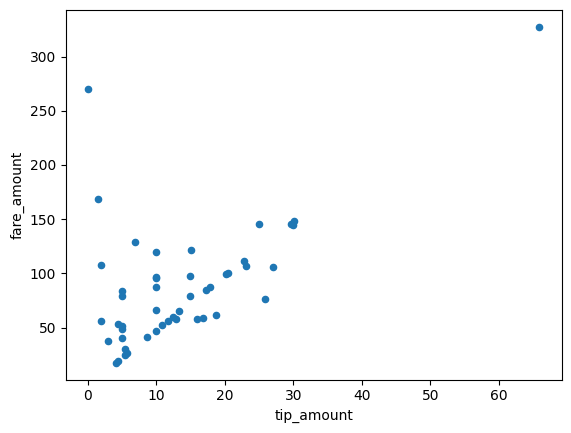

In [ ]:
taxi = pd.read_parquet('./yellow_tripdata_2021-05.parquet', columns=['trip_distance', 'tpep_pickup_datetime',"tip_amount", "fare_amount","RatecodeID"])

taxi.query("tpep_pickup_datetime>='2021-05-09' and tpep_pickup_datetime<'2021-05-10'",
 inplace=True)
taxi.query("tip_amount<=100 and fare_amount>0 and RatecodeID==4 and tip_amount>0",
inplace=True)

taxi.plot.scatter(x = 'tip_amount', y = 'fare_amount')

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.linear_model import RANSACRegressor, LinearRegression

ransac = RANSACRegressor(estimator = LinearRegression(), max_trials=100, random_state = 42, loss = 'squared_error', residual_threshold=10)

ransac.fit(
    taxi['tip_amount'].to_numpy().reshape(-1,1),
    taxi['fare_amount'].to_numpy().reshape(-1,1)
)

inliers_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inliers_mask)

Text(0.5, 1.0, 'RANS - outliers and inliners')

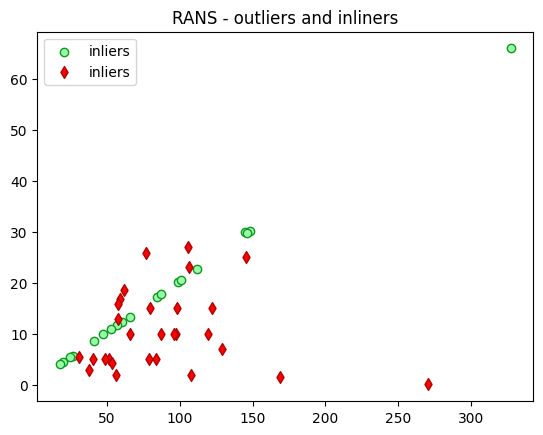

In [ ]:
plt.scatter(taxi['fare_amount'][inliers_mask], taxi['tip_amount'][inliers_mask], c ='#99FDA7', marker = 'o', label = 'inliers', edgecolors='#0E9820')
plt.scatter(taxi['fare_amount'][outlier_mask], taxi['tip_amount'][outlier_mask], c ='#FF0000', marker = 'd', label = 'inliers', edgecolors='#AC0000')
plt.legend()
plt.title('RANS - outliers and inliners')